# Classificação de Texto com spaCy

# Importação

In [1]:
!pip install spacy==2.2.3

In [4]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [2]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np


In [3]:
spacy.__version__

'2.2.3'

# Base de dados

In [5]:
base_Dados = pd.read_csv("base_treinamento.txt", encoding="utf-8")

In [6]:
base_Dados.shape

(196, 2)

In [7]:
base_Dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


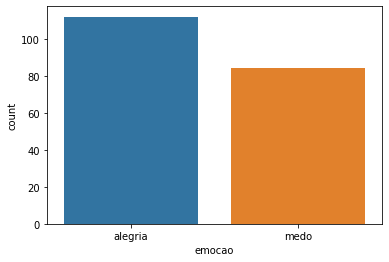

In [8]:
sns.countplot(base_Dados['emocao'], label = 'Contagem');

# Pré_processamento

In [9]:
pontuacao = string.punctuation
pontuacao

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [11]:
pln = spacy.load('pt_core_news_sm')
pln

In [12]:
def preprocessamento(texto):
  
  documento = pln(texto.lower())
  lista = []

  for token in documento:
    # Usando Lematização
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacao]
  lista = " ".join(([str(elemento) for elemento in lista if not elemento.isdigit()]) )
  return lista

In [13]:
exempplo = preprocessamento('Estou aprendo Processamento de linguagem natural, sou do Rio de Janeiro')
exempplo

'aprender processamento linguagem natural rir janeiro'

In [14]:
base_Dados['texto']= base_Dados['texto'].apply(preprocessamento)
base_Dados.head()

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria


In [15]:
# Tratando as classes

base_Dados_final = []

for texto, emocao in zip(base_Dados['texto'], base_Dados['emocao']):

  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, "MEDO": False})

  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, "MEDO": True})

  base_Dados_final.append([texto, dic.copy()])

In [16]:
base_Dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Classificador

In [17]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [19]:
modelo.begin_training()

for epoca in range(1000):
  random.shuffle(base_Dados_final)
  losses = {}

  for batch in spacy.util.minibatch(base_Dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats' : entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses = losses)
  
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.007309003791306168}
{'textcat': 1.796288318089978e-07}
{'textcat': 5.154637783277849e-08}
{'textcat': 2.5954845828124462e-08}
{'textcat': 1.668900173612542e-08}
{'textcat': 1.0348375156787881e-08}
{'textcat': 8.165223497336171e-09}
{'textcat': 6.257491913519431e-09}
{'textcat': 5.281605597318162e-09}
{'textcat': 5.374498734944666e-09}


In [20]:
historico

[{'textcat': 0.007309003791306168},
 {'textcat': 1.796288318089978e-07},
 {'textcat': 5.154637783277849e-08},
 {'textcat': 2.5954845828124462e-08},
 {'textcat': 1.668900173612542e-08},
 {'textcat': 1.0348375156787881e-08},
 {'textcat': 8.165223497336171e-09},
 {'textcat': 6.257491913519431e-09},
 {'textcat': 5.281605597318162e-09},
 {'textcat': 5.374498734944666e-09}]

In [23]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get("textcat"))

In [24]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.30900379e-03, 1.79628832e-07, 5.15463778e-08, 2.59548458e-08,
       1.66890017e-08, 1.03483752e-08, 8.16522350e-09, 6.25749191e-09,
       5.28160560e-09, 5.37449873e-09])

Text(0, 0.5, 'Erro')

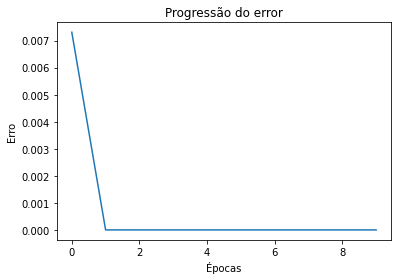

In [26]:
import matplotlib.pyplot as plt

plt.plot(historico_loss)
plt.title("Progressão do error")
plt.xlabel("Épocas")
plt.ylabel("Erro")

In [27]:
modelo.to_disk("modelo")

# Testando o modelo

In [28]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [29]:
texto_positivo = "Eu adoro a cor do céu"

In [30]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar o cor céu'

In [31]:
previsao = modelo_carregado(texto_positivo)
previsao.cats

{'ALEGRIA': 0.9997937083244324, 'MEDO': 9.463807509746403e-05}

In [32]:
texto_negativo = "Ela tem medo de todos nós, mas hoje sorri"
texto_negativo = preprocessamento(texto_negativo)

In [34]:
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'ALEGRIA': 0.4782835841178894, 'MEDO': 0.3096868693828583}

In [35]:
Ramon = preprocessamento('o chihuahua é o animal mais distante de deus')
modelo_carregado(Ramon).cats

{'ALEGRIA': 0.20239979028701782, 'MEDO': 0.8578912019729614}

In [39]:
lusca = preprocessamento('Eu sou o anjo que salva a todos')
modelo_carregado(lusca).cats

{'ALEGRIA': 0.9989290833473206, 'MEDO': 0.0012074457481503487}

In [56]:
Ramon = preprocessamento('fadas açucaradas morando no fim do arco íris')
modelo_carregado(Ramon).cats

{'ALEGRIA': 0.979663074016571, 'MEDO': 0.01649300940334797}

# Avaliação do modelo

## Base de treinamento

In [37]:
previsoes = []

for texto in base_Dados['texto']:

  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

In [41]:
previsoes_final = []

for previsao in previsoes:

  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append("alegria")

  else:
    previsoes_final.append("medo")

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [42]:
respostas_reais = base_Dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(respostas_reais, previsoes_final)

1.0

In [44]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Base de Teste

In [45]:
base_teste = pd.read_csv("/content/base_teste.txt", encoding = "utf-8")

In [46]:
base_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [48]:
base_teste['texto'] = base_teste['texto'].apply(preprocessamento)

In [49]:
base_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [50]:
previsoes = []

for texto in base_teste['texto']:

  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [51]:
previsoes_final = []

for previsao in previsoes:

  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append("alegria")

  else:
    previsoes_final.append("medo")

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'medo', 'medo', 'alegria', 'alegria', 'alegria', 'medo', 'medo',
       'medo', 'alegria', 'medo', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'medo', 'medo',
       'alegria', 'medo', 'medo', 'alegria', 'alegria', 'alegria', 'medo',
       'medo', 'medo', 'alegria', 'medo', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'medo', 'medo',
       'medo', 'medo', 'alegria', 'alegria', 'alegria', 'alegria', 'medo',
       'medo'], dtype='<U7')

In [52]:
respostas_reais = base_teste['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(respostas_reais, previsoes_final)

0.5833333333333334

In [54]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[34, 14],
       [21, 15]])